In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nle.dataset import db

In [2]:
def get_dataset_stats(dataset_name, dbfilename=db.DB):
    sql_args = (dataset_name,)
    
    sql = """
    SELECT games.gameid, games.points, games.turns, games.maxlvl
    FROM games
    INNER JOIN datasets ON games.gameid=datasets.gameid
    WHERE datasets.dataset_name=? AND games.role='Mon' AND games.race='Hum'"""

    with db.connect(dbfilename) as conn:
        data = list(conn.execute(sql, sql_args))
        stats = pd.DataFrame(data, columns=["gameid", "points", "turns", "maxlvl"])
    return stats

In [3]:
dbfilename = "/home/bartek/Workspace/data/nethack/AANAO/ttyrecs.db"

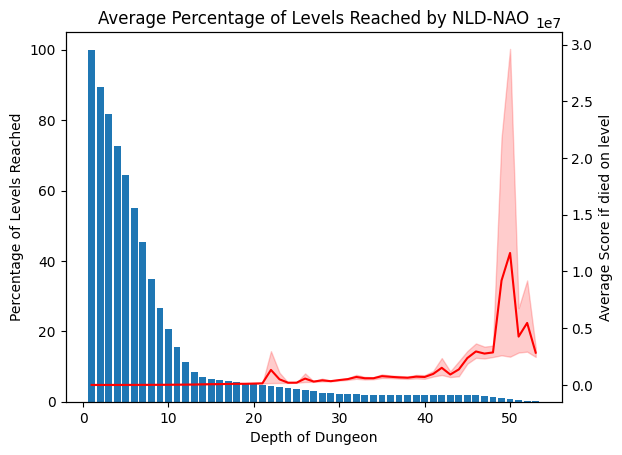

In [4]:
dataset_name = "altorg"
df = get_dataset_stats(dataset_name, dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="maxlvl", y="points", color="red", errorbar=('ci', 90), ax=ax2)

plt.title(f"Average Percentage of Levels Reached by NLD-NAO")
plt.show()

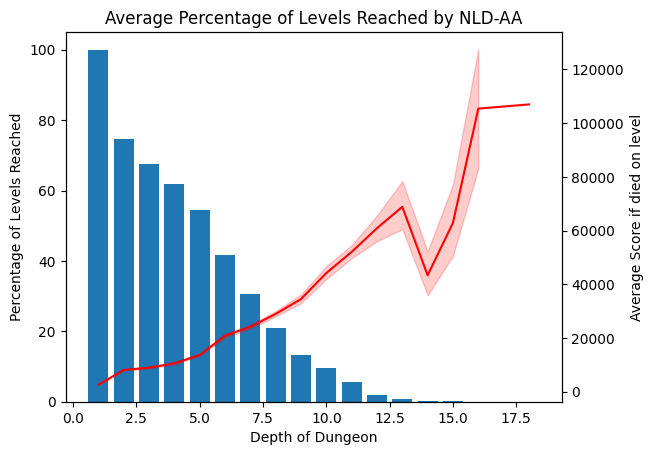

In [5]:
dataset_name = "autoascend"
df = get_dataset_stats(dataset_name, dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="maxlvl", y="points", color="red", errorbar=('ci', 90), ax=ax2)


plt.title(f"Average Percentage of Levels Reached by NLD-AA")
plt.show()

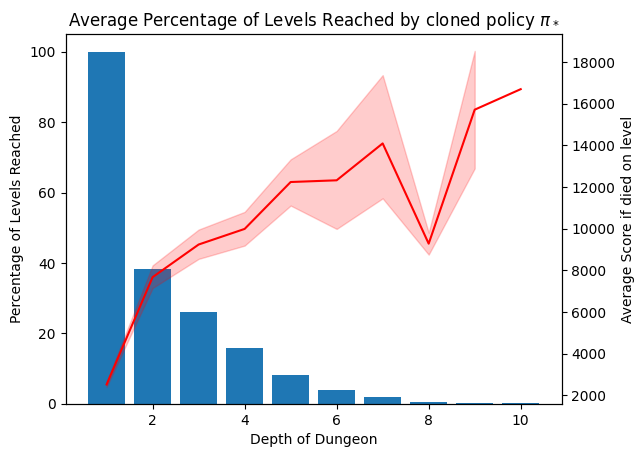

In [6]:
df = pd.read_csv("notebooks/cloned_expert_1024_human_monk.csv")

# Example data
levels_reached = df["dlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="dlvl", y="score", color="red", errorbar=('ci', 90), ax=ax2)

plt.title(f"Average Percentage of Levels Reached by cloned policy $\pi_*$")
plt.show()

Text(0.5, 1.0, 'State visitation problem in NetHack')

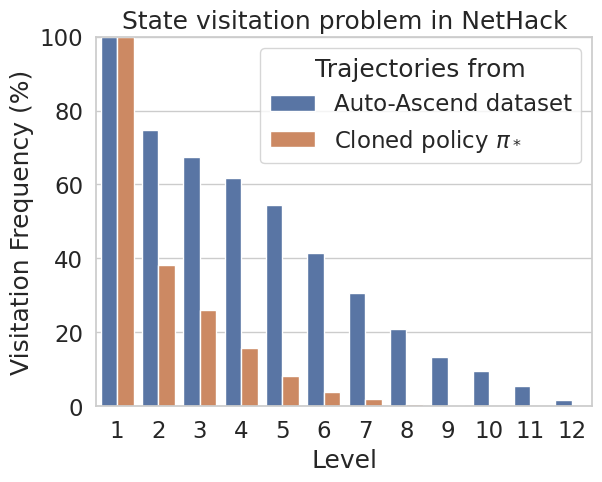

In [7]:
sns.set(font_scale=1.5)

sns.set_style("whitegrid")
df = get_dataset_stats("autoascend", dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]
depths = depths[:12]
percentage = percentage[:12]
aa_df = pd.DataFrame({"depth": depths, "visitation %": percentage, "Gathered from": "Auto-Ascend dataset"})

df = pd.read_csv("notebooks/cloned_expert_1024_human_monk.csv")

# Example data
levels_reached = df["dlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]
depths = depths[:12]
percentage = percentage[:12]
bc_df = pd.DataFrame({"depth": depths, "visitation %": percentage, "Gathered from": "Cloned policy $\pi_*$"})

df = pd.concat([aa_df, bc_df]).reset_index()
sns.barplot(data=df, x="depth", y="visitation %", hue="Gathered from")
# plt.xlim([-0, 9])
plt.legend(loc="upper right", title="Trajectories from")
plt.ylim([0, 100])
plt.xlabel("Level")
plt.ylabel("Visitation Frequency (%)")
plt.title("State visitation problem in NetHack")